In [1]:
! pip install tensorflow

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [3]:

# Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [4]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# One-hot encode target labels
lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)


In [6]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)


In [7]:
# ---- Build MLP model ----
model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),  # First hidden layer
    Dense(8, activation='relu'),                     # Second hidden layer
    Dense(3, activation='softmax')                   # Output layer for 3 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0, validation_split=0.2)


In [10]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 1.00


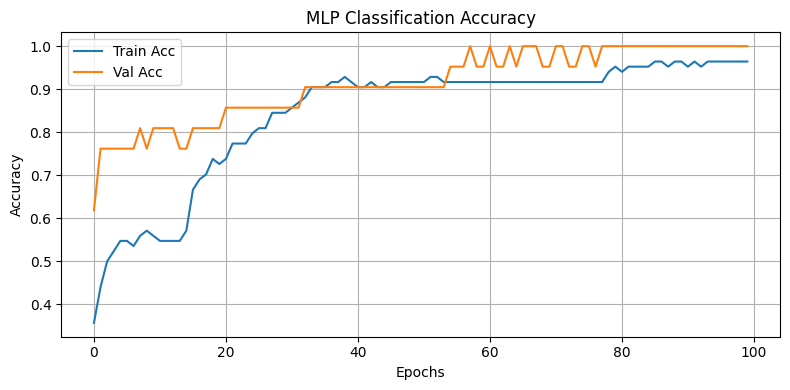

In [11]:
# ---- Plot training history ----
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('MLP Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()